# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [16]:
df=pd.read_csv("diabetes.csv")

In [17]:
df.head() # check first rows of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Shape of data

In [18]:
df.shape

(768, 9)

**Observation**
- There ar 768 rows and 9 columns in dataset

In [19]:
df.describe().T # overview of data

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Checking the Nans Value 

In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observation**
- dataset is clean there is no null value

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

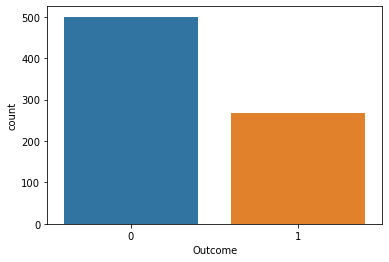

In [23]:
sns.countplot(data=df,x=df.Outcome)

**Observation**
- In dataset 500 Patients are diabetes
- remaining 268 patients are not diabetes

<AxesSubplot:ylabel='Frequency'>

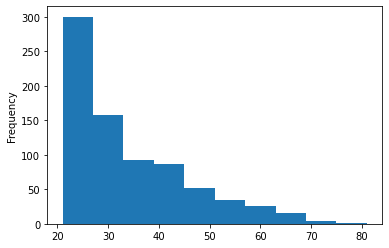

In [24]:
df.Age.plot.hist()

**Observation**
- majority people age are between 20-30

In [25]:
corr_mat=df.corr()

<AxesSubplot:>

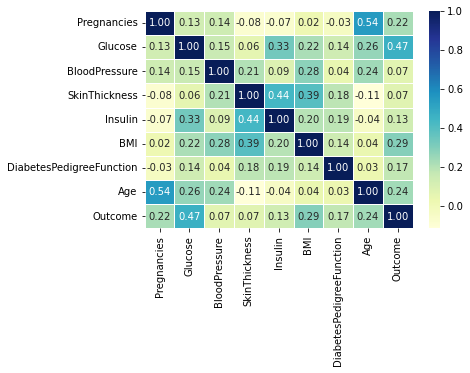

In [26]:
sns.heatmap(corr_mat,annot=True,linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Train-Test Splitting

In [43]:
x.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21


In [28]:
x=df.drop(labels="Outcome",axis=1)
y=df.Outcome

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (537, 8)
y_train (537,)
X_test (231, 8)
y_test (231,)


**Observation**
- now the data is split in features and target variable

In [50]:
print("LogisticRegressionCV Model")
print(" ")
lr=LogisticRegressionCV()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy:",round(accuracy_score(y_pred,y_test)*100))

LogisticRegressionCV Model
 
Accuracy: 77.05627705627705
